In [92]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Загрузим датасет в ноутбук

In [56]:
df = pd.read_excel('dataframe.xlsx')

Построим гистограмму распределения количества случаев травм разных частей тела

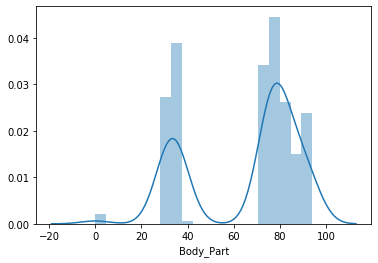

In [58]:
sns.distplot(df['Body_Part'], bins=20)

Как видим, первая по травмоопасности часть тела - под номером 80, вторая - под номером 35. Конкретную расшифровку можно посмотреть на сайте, но можем предположить, что под "80" скрывается рука, а под "35" - нога.

Также попробуем узнать, есть ли различия по полу в количестве задействованных в несчастном случае людей

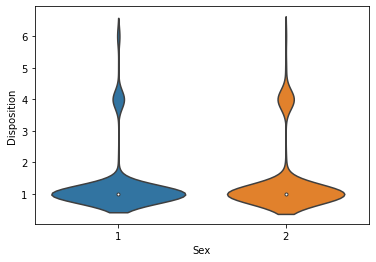

In [60]:
sns.violinplot(x='Sex', y = 'Disposition', data = df)

Можем заметить, что визуально серьезных различий не наблюдается, однако по ширине графика можем сказать, что случаев с одним участником было больше для мужчин, а случаев с тремя-четырьмя участниками, соответственно, для женщин

Теперь с помощью построения графика по факторам узнаем, каковы различия между набором полученных травм между мужчинами и женщинами с учетом их возраста

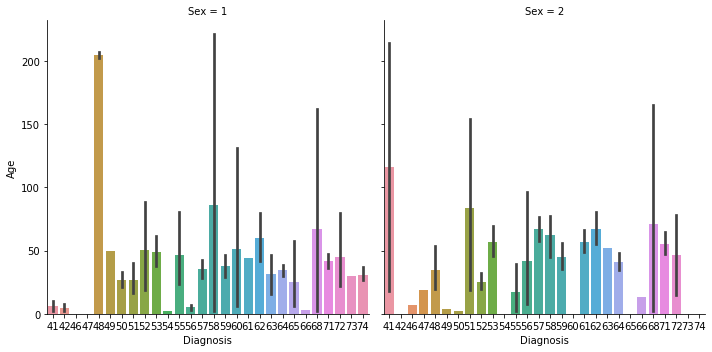

In [75]:
sns.catplot(x = 'Diagnosis', y = 'Age', data = df, kind='bar', col="Sex")

Видим, что для мужчин чаще всего ставился диагноз под номером 48, для женщин - 41. Также график полезен для выявления выбросов - видим, что для некоторых диагнозов возраст превышает 200 лет. Это означает не полную точность данных - возможно, составители ошиблись при вбивании возраста вручную, возможно в датасете съехали значения по колонкам - это нужно уже выяснять в дальнейшем

Наконец, узнаем, есть ли связь между наличием огня в несчастном случае и возрастом пациента

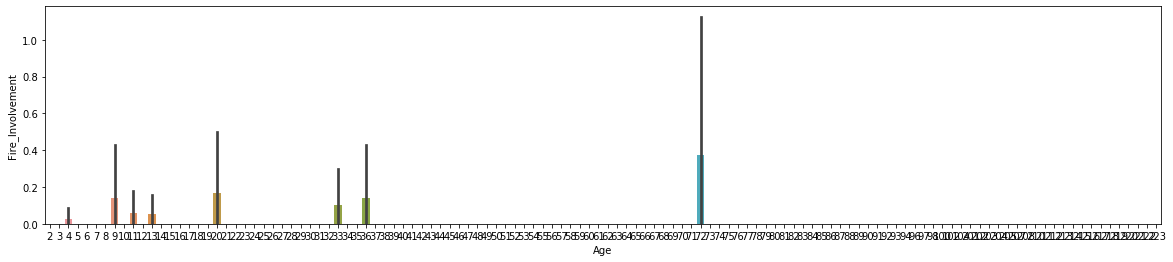

In [94]:
plt.figure(figsize=(20, 4))
sns.barplot(x='Age', y='Fire_Involvement', data=df)

Видим, что наибольшее число несчастных случаев с огнем было зафиксировано для людей пожилого возраста - около 72 лет. Второй возраст по огнеопасности - 20 лет